In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [191]:
df = pd.read_csv('final_data.csv')
df.drop(["name", "repo_names", "react_7"], axis=1, inplace = True)

In [192]:
df

react_1   react_3  react_5  react_6  react_9  react_11  react_12  \
0      True  0.000000    False     True    False         0      True   
1      True  0.000000    False    False    False         0     False   
2     False  0.000000     True     True    False         0      True   
3      True  1.000000     True     True    False         0     False   
4      True  0.142857     True     True    False         0      True   
..      ...       ...      ...      ...      ...       ...       ...   
95     True  0.000000     True     True    False         0      True   
96     True  0.285714     True     True    False         0     False   
97    False  0.000000     True    False    False         0      True   
98     True  0.285714     True     True    False         0      True   
99     True  0.142857    False     True    False         0      True   

    react_14  react_23  react_26  ...  react_79  react_80  react_81  react_84  \
0   0.461312     False      True  ...      True     0.625      True  0.526316   
1   0.612004     False     False  ...      True     0.750      True  0.526316   
2   0.014839     False      True  ...      True     0.625      True  0.684211   
3   0.021098     False     False  ...      True     0.750      True  0.842105   
4   0.228175     False      True  ...      True     0.250      True  0.052632   
..       ...       ...       ...  ...       ...       ...       ...       ...   
95  0.021397     False     False  ...      True     0.625      True  0.263158   
96  0.008170     False      True  ...      True     0.500      True  0.263158   
97  0.027067     False     False  ...      True     0.250      True  0.000000   
98  0.007731     False      True  ...      True     0.625      True  0.263158   
99  0.000000     False      True  ...      True     0.500      True  0.000000   

    react_89  react_94  react_97  react_99  react_101  sustainability_score  
0      False     False      True     False      False               29.8874  
1       True      True      True     False      False                6.0945  
2      False      True      True      True      False               59.8044  
3       True      True      True      True       True               79.9014  
4      False     False      True      True       True               54.8685  
..       ...       ...       ...       ...        ...                   ...  
95     False     False      True      True       True               64.9451  
96     False      True      True      True       True               35.0421  
97     False     False      True     False       True               11.6286  
98     False     False      True      True       True               79.9123  
99     False     False      True     False       True               37.6120  

[100 rows x 32 columns]

In [193]:
rq3_df = df

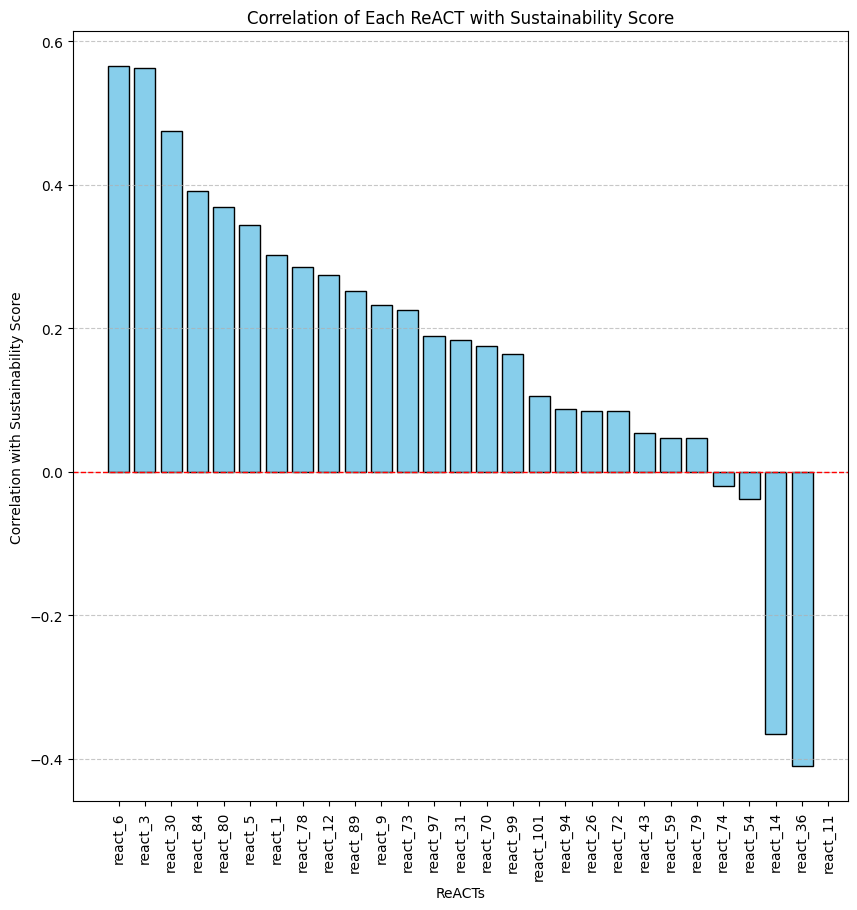

In [202]:
correlation_values = rq3_df.corr()['sustainability_score'].drop('sustainability_score').sort_values(ascending=False)

plt.figure(figsize=(10, 10))
plt.bar(correlation_values.index, correlation_values.values, color='skyblue', edgecolor='black')

plt.xticks(rotation=90) 
plt.xlabel("ReACTs")
plt.ylabel("Correlation with Sustainability Score")
plt.title("Correlation of Each ReACT with Sustainability Score")
plt.axhline(0, color='red', linestyle='dashed', linewidth=1) 
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.savefig('plot_rq3_1.png', bbox_inches='tight')

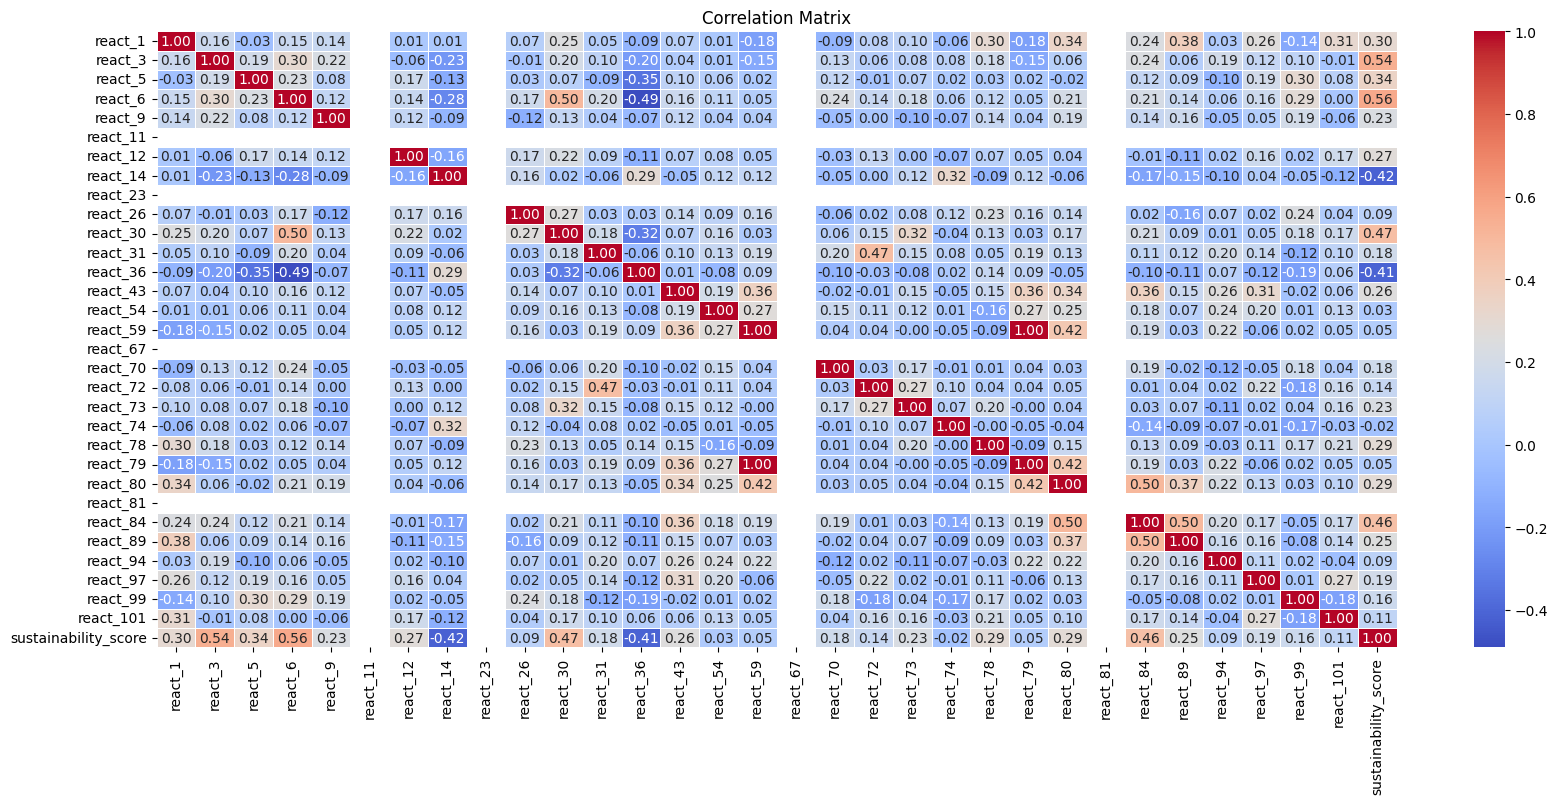

In [195]:
correlation_matrix = rq3_df.corr()

plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Matrix")
plt.savefig('plot_rq3_2.png', bbox_inches='tight')

In [196]:
df.head()

react_1   react_3  react_5  react_6  react_9  react_11  react_12  react_14  \
0     True  0.000000    False     True    False         0      True  0.461312   
1     True  0.000000    False    False    False         0     False  0.612004   
2    False  0.000000     True     True    False         0      True  0.014839   
3     True  1.000000     True     True    False         0     False  0.021098   
4     True  0.142857     True     True    False         0      True  0.228175   

   react_23  react_26  ...  react_79  react_80  react_81  react_84  react_89  \
0     False      True  ...      True     0.625      True  0.526316     False   
1     False     False  ...      True     0.750      True  0.526316      True   
2     False      True  ...      True     0.625      True  0.684211     False   
3     False     False  ...      True     0.750      True  0.842105      True   
4     False      True  ...      True     0.250      True  0.052632     False   

   react_94  react_97  react_99  react_101  sustainability_score  
0     False      True     False      False               29.8874  
1      True      True     False      False                6.0945  
2      True      True      True      False               59.8044  
3      True      True      True       True               79.9014  
4     False      True      True       True               54.8685  

[5 rows x 32 columns]

In [197]:
numerical_cols = ['react_3', 'react_14', 'react_36', 'react_43', 'react_54', 'react_72', 'react_80', 'react_84']

In [198]:
for col in numerical_cols:
    avg = df[col].mean()
    df[col] = df[col].apply(lambda x: True if x >= avg else False)

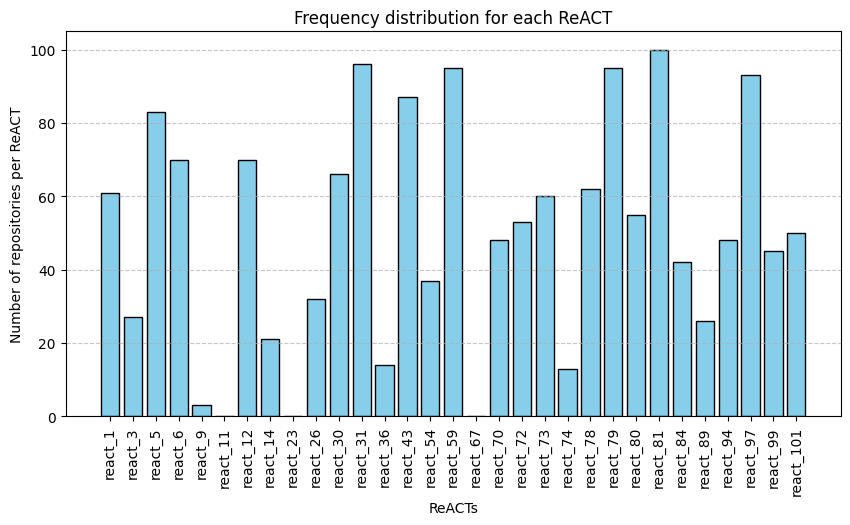

In [199]:
rq1_df = df.drop('sustainability_score', axis=1)
frequencies = rq1_df.apply(lambda col: (col == True).sum() if col.dtype == 'bool' else (col == 1).sum())

plt.figure(figsize=(10, 5))
plt.bar(frequencies.index, frequencies.values, color='skyblue', edgecolor='black')

plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.xlabel("ReACTs")
plt.ylabel("Number of repositories per ReACT")
plt.title("Frequency distribution for each ReACT")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.savefig('plot_rq1.png', bbox_inches='tight')

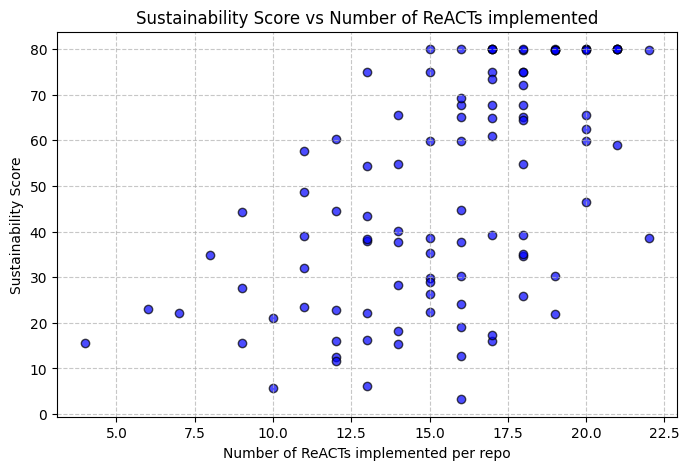

In [200]:
num_reacts = rq1_df.apply(lambda row: (row == True).sum() if row.dtype == 'bool' else (row == 1).sum(), axis=1)

plt.figure(figsize=(8, 5))
plt.scatter(num_reacts, df['sustainability_score'], alpha=0.7, color="blue", edgecolors="black")

plt.xlabel("Number of ReACTs implemented per repo")
plt.ylabel("Sustainability Score")
plt.title("Sustainability Score vs Number of ReACTs implemented")
plt.grid(True, linestyle="--", alpha=0.7)

plt.savefig('plot_rq2.png', bbox_inches='tight')

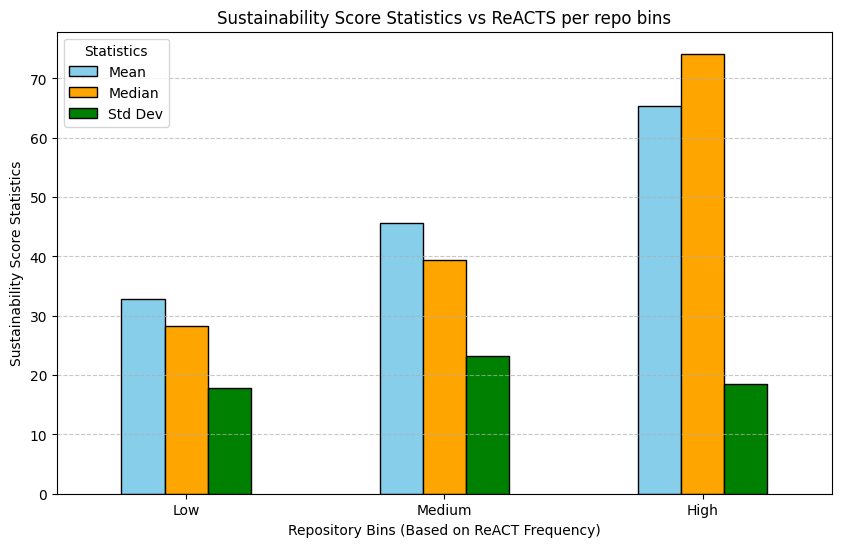

In [201]:
rq4_scores = df['sustainability_score']

frequencies = rq2_df.apply(lambda col: (col == True).sum() if col.dtype == 'bool' else (col == 1).sum())
frequency_map = {k: v for k, v in enumerate(frequencies)}
sorted_frequency_map = sorted(frequency_map.items(), key=lambda x: x[1])

low = sorted_frequency_map[:33]
medium = sorted_frequency_map[33:66]
high = sorted_frequency_map[66:]

low_score = [df['sustainability_score'].iloc[i[0]] for i in low]
medium_score = [df['sustainability_score'].iloc[i[0]] for i in medium]
high_score = [df['sustainability_score'].iloc[i[0]] for i in high]

stats = {
    "Bin": ["Low", "Medium", "High"],
    "Mean": [np.mean(low_score), np.mean(medium_score), np.mean(high_score)],
    "Median": [np.median(low_score), np.median(medium_score), np.median(high_score)],
    "Std Dev": [np.std(low_score), np.std(medium_score), np.std(high_score)]
}

stats_df = pd.DataFrame(stats).set_index("Bin")

stats_df.plot(kind="bar", figsize=(10, 6), color=["skyblue", "orange", "green"], edgecolor="black")

plt.xlabel("Repository Bins (Based on ReACT Frequency)")
plt.ylabel("Sustainability Score Statistics")
plt.title(f"Sustainability Score Statistics vs ReACTS per repo bins")
plt.xticks(rotation=0)
plt.legend(title="Statistics")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.savefig('plot_rq4.png', bbox_inches='tight')

In [ ]:
df["bin"] = pd.qcut(df[y], q=3, labels=["Low", "Medium", "High"])

colors = {"Low": "red", "Medium": "orange", "High": "green"}

plt.figure(figsize=(8, 5))
for label, color in colors.items():
    subset = df[df["bin"] == label]
    plt.scatter(subset[x_column], subset[y_column], alpha=0.7, color=color, edgecolors="black", label=label)

plt.xlabel(x_column)
plt.ylabel(y_column)
plt.title(f"Scatter Plot of {x_column} vs {y_column} (3 Bins)")
plt.legend(title="Bins")
plt.grid(True, linestyle="--", alpha=0.7)

plt.show()